This notebook computes Einstein B coefficients from the input Einstein A coefficient.  It then computes the rates between two levels linked by the coefficients and show the equilibration fo the two levels.

To begin, we import the necessary libraries.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.constants as const

Retrieve the key physical constants (all in MKS).

In [2]:
h = const.h
c = const.c
kB = const.k
eV_to_J = const.physical_constants['electron volt-joule relationship'][0]

Input a two level system: g-multiplicity and E-energy level (in eV).

In [3]:
g1 = 1
g2 = 3
E1 = 0
E2 = 6700

Input the spontaneous decay rate $A_{21}$ (per second).

In [4]:
A21 = 4.57e+14

Convert to MKS units.

In [5]:
E1 *= eV_to_J
E2 *= eV_to_J

Input the temperature of the system (in K).

In [6]:
T = 1e8

Calculate the frequency of photon that could make this transition.

In [7]:
nu = ( E2 - E1 )/h

Calculate and print out the mean intensity.

In [8]:
J = ( ( 2*h*(nu**3)) / (c**2) )/(np.exp( (h*nu) / (kB*T) )-1)
print('J = ' + str(J) + ' Joules per meter squared per second per steradian per Hertz')

J = 53310.53370780987 Joules per meter squared per second per steradian per Hertz


Calculate and print out the B-coefficients.

In [9]:
B21 = ((c**2) / (2*h*(nu**3))) * A21
B12 = B21 * ( g2 / g1 )

Jstr = ' m^2 steradians / J seconds'

print('B_{21} = ' + str(B21) + Jstr)
print('B_{12} = ' + str(B12) + Jstr)

B_{21} = 7289270654.848217 m^2 steradians / J seconds
B_{12} = 21867811964.54465 m^2 steradians / J seconds


Calculate and print out the emission rate and absorption rate.

In [10]:
lambda12 = B12 * J
lambda21 = A21 + B21 * J

print('Absorption rate: lambda_{12} = ' + str(lambda12) + ' per second')
print('Total emission rate: lambda_{21} = ' + str(lambda21) + ' per second')

Absorption rate: lambda_{12} = 1165784726851905.5 per second
Total emission rate: lambda_{21} = 845594908950635.2 per second


Input the initial population probability of the two states.

In [11]:
x1_0 = 0
x2_0 = 1

Check the input probabilities.

In [12]:
assert(x1_0 + x2_0 == 1.0)

Compute the time duration for the evolution of population in the two states.

In [13]:
lambda_eff = (lambda12 + lambda21)
t = np.linspace(0, 10 / lambda_eff, 1000)

Calculate the evolution of the population probabilities.

In [14]:
f = lambda_eff*t
expf =  np.expm1(-f)+1
x1 = x1_0 * expf + (lambda21/(lambda_eff))*(1-expf)
x2 = x2_0 * expf + (lambda12/(lambda_eff))*(1-expf)

Make a plot to show the evolution.

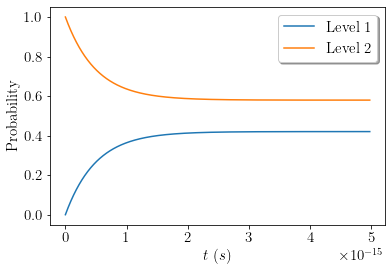

In [15]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['font.size'] = 15

plt.plot(t, x1, label="Level 1" )
plt.plot(t, x2, label="Level 2" )

plt.legend(loc='upper right', shadow=True)

plt.xlabel( '$t\ (s)$' )
plt.ylabel('Probability')

plt.show()